In [176]:
# Part II: Fit logistic regression iris using binary cross entropy cost function
from sklearn import datasets
import numpy as np 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

class Preprocessing(): 

  def __init__(self, train_ratio, test_ratio, val_ratio):
    ''' Class constructor for Preprocessing. This class holds methods to process
        raw input data into training/testing/validation sets for downstream
        logistic regression. '''
    self.train_ratio =  train_ratio
    self.test_ratio = test_ratio
    self.val_ratio = val_ratio

  
  def import_data(self):   
    ''' Import iris dataset from SKL '''
    iris = datasets.load_iris()  # import iris dataset

    features = iris["data"][:, :] # separate features  
    labels = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
    
    return features, labels


  def create_train_set(self, features, labels): 
    ''' Stratify X, y data into training and testing sets. Want test datasets 
        to have 10% size of original datasets. '''
    # call train_test_split function on original dataset to create train/test
    X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                        test_size=self.test_ratio, 
                                                        random_state=42)
    return X_train, X_test, y_train, y_test


  def create_validation_set(self, X_train, y_train): 
    ''' Create validation sets from X_train, y_train input datasets. Validation
        set will compose 10% of training sets'''
    # call internal variables to definte validation set ratio 
    val_set_ratio = self.val_ratio / (self.train_ratio + self.test_ratio)
    # call train_test_split function on training set to create validation sets
    X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, 
                                                      test_size=val_set_ratio, 
                                                      random_state=42)
    return X_train_new, X_val, y_train_new, y_val



In [185]:
class Logistic_Regression: 

  def sigmoid(x):
    ''' activation function - sigmoid '''
    return 1/(1 + np.exp(-x))

  
  def entropy(y, prediction):
    ''' loss function: binary cross entropy ''' 
    loss = -np.mean(y*(np.log(prediction)) - (1-y)*np.log(1-prediction))
    return loss

  
  def mean_square_error(y, prediction): 
    ''' loss function: mean square error '''
    a = y.shape[0]  # store array shape 
    y = y.reshape(a,1)
    loss = np.square(np.subtract(y, prediction)).mean()
    return loss


  def gradient_entropy(X, y, prediction):
    ''' input training array, labels, and predicted value into gradient of 
        entropy loss function for gradient descent '''
    errors = prediction - y  # store prediction error 
    dw = (1 / len(X)) * np.dot(X.T, errors)  # gradient wrt weights
    db = (1 / len(X)) * np.sum((errors))  # gradient wrt bias 
    
    return dw, db

  
  def gradient_mse(X, y, prediction): 

    term1 = prediction - y  # short hand for first subtraction term 
    term2 = 1 - prediction  # short hand for second subtraction term 

    # update weight gradient 
    temp1 = np.dot(term1.T, prediction)  # mtx multiply first two terms 
    temp2 = np.dot(term2.T, X)  # mtx multiply last two terms 
    dw = (-2 / len(X) ) * np.dot(temp1, temp2)  # update gradient 

    # update bias gradient 
    temp3 = np.dot(term1.T, prediction) 
    temp4 = np.dot(temp3, term2.T) 
    db = (-2 / len(X) + np.sum(temp4))

    return dw.T, db


  def train_entropy(X_train, y_train, X_val, y_val, max_iter, learning_rate):
    ''' training function for logistic regression. Intakes training datasets 
        (X and y), validation datasets (X and y), number of training epochs 
        (maximum number of training iterations), and learning rate (step size 
        for gradient descent). Outputs 3 arrays containing final weights, bias,
        and losses from each epoch.'''
    tolerance = 0.02
    m, n = X_train.shape  # store [num training instances, num features]
  
    w = np.zeros((n,1))  # initialize weights to 0 
    b = 0  # initialize bias to 0 
    
    y_train = y_train.reshape(m,1)  # define y second dimension 
    losses = []  # initialize empty list to hold loss outputs

    for i in range(max_iter):  # limit training by number of epochs 
      # calculate weighted sum of inputs
      weighted_sum = np.dot(X_train,w) + b  
      # pass weighted sum into activation function to return prediction
      prediction = Logistic_Regression.sigmoid(weighted_sum)  

      # calculate gradients based on prediction
      dw, db = Logistic_Regression.gradient_entropy(X_train, y_train, 
                                                    prediction)  
      # Update weights and bias 
      w = w - (learning_rate * dw)
      b = b - (learning_rate* db)

      ## repeat weighted sum, prediction calculation using validation set 
      validation_sum = np.dot(X_val,w) + b
      validation_prediction = Logistic_Regression.sigmoid(validation_sum)
      # calculate loss using validation set and append to list 
      loss = Logistic_Regression.entropy(y_val, validation_prediction)
      losses.append(loss)

      if i > 10:  # minimum number of training iterations 
        term_cond_1 = losses[i]-losses[i-1] # check if loss increased 
        term_cond_2 = losses[i-1]-losses[i-2]  # check if loss increased again
        if term_cond_1 < tolerance and term_cond_2 < tolerance:  # early
            break
    
    return w, b, losses

  def train_mse(X_train, y_train, X_val, y_val, max_iter, learning_rate):
    ''' training function for logistic regression. Intakes training datasets 
        (X and y), validation datasets (X and y), number of training epochs 
        (maximum number of training iterations), and learning rate (step size 
        for gradient descent). Outputs 3 arrays containing final weights, bias,
        and losses from each epoch.'''
    tolerance = 0.02
    m, n = X_train.shape  # store [num training instances, num features]
  
    w = np.zeros((n,1))  # initialize weights to 0 
    b = 0  # initialize bias to 0 
    
    y_train = y_train.reshape(m,1)  # define y second dimension 
    losses = []  # initialize empty list to hold loss outputs

    for i in range(max_iter):  # limit training by number of epochs 
      # calculate weighted sum of inputs
      weighted_sum = np.dot(X_train,w) + b  
      # pass weighted sum into activation function to return prediction
      prediction = Logistic_Regression.sigmoid(weighted_sum)  

      # calculate gradients based on prediction
      dw, db = Logistic_Regression.gradient_mse(X_train, y_train, prediction)  
      # Update weights and bias 
      w = w - (learning_rate * dw)
      b = b - (learning_rate* db)

      ## repeat weighted sum, prediction calculation using validation set 
      validation_sum = np.dot(X_val,w) + b
      validation_prediction = Logistic_Regression.sigmoid(validation_sum)
      # calculate loss using validation set and append to list 
      loss = Logistic_Regression.mean_square_error(y_val, validation_prediction)
      losses.append(loss)

      if i > 10:  # minimum number of training iterations 
        term_cond_1 = losses[i]-losses[i-1] # check if loss increased 
        term_cond_2 = losses[i-1]-losses[i-2]  # check if loss increased again
        if term_cond_1 < tolerance and term_cond_2 < tolerance:  # early
            break
    
    return w, b, losses

  
  def predicted_output(X, weights, bias): 
    ''' Only run this function after completed training. Accepts input dataset
        of instances, trained weights and bias. Outputs predictions between 
        [0,1] and labels [0 or 1]'''
    # calculate weighted sum of inputs
    weighted_sum = np.dot(X,weights) + bias  
    # pass weighted sum into activation function to return prediction
    predictions = Logistic_Regression.sigmoid(weighted_sum)  

    labels = np.zeros((len(X),1))  # initialize array to hold predicted labels  
    for i in range(len(predictions)):  # iter across predicted values 
      if predictions[i] > 0.5:  # check for predictions >0.5
        labels[i] = 1  # set label ==1 for given predictions 

    return predictions, labels


  def plot_loss_epochs(losses): 
    ''' Plot training loss outputs against number of epochs '''
    x = np.arange(0, len(losses))  # create array [0,epochs] to set x axis bounds
    y = losses  # store losses as y for plotting purposes 
    plt.plot(x, y, color = 'k')
    plt.xlabel('Number of Training Epochs')
    plt.ylabel('Validation Set Loss')
    plt.title('Training Loss Over Multiple Epochs')
    plt.xlim(0,len(losses))
    return  # null return 

  
  def accuracy(predictions, labels): 
    a = labels.shape[0]
    labels = labels.reshape(a,1)

    errors = np.absolute(predictions - labels)  # find elt-wise differences
    sum_errors = np.sum(errors)  # only wrong predictions will have +1 value
    avg = sum_errors / len(errors)  # divide sum by total number of predictions 
    percent_correct = 1 - avg
    return percent_correct


In [186]:
# instantiate Preprocessing class instance  
Processor = Preprocessing(train_ratio=0.8, test_ratio=0.1, val_ratio=0.1)
# import Iris data set and store into X and y matrices 
X, y = Processor.import_data()   
# split X, y input datasets into training and testing sets (90:10)
X_train_set, X_test, y_train_set, y_test = Processor.create_train_set(X,y)  
# split training dataset into training and validation sets (90:10)
X_train, X_val, y_train, y_val = Processor.create_validation_set(X_train_set, 
                                                                 y_train_set)
# train logistic regressor 
trained_weights, trained_bias, loss = Logistic_Regression.train_entropy(X_train, 
                                                                y_train, X_val, 
                                                                y_val, 50, 0.1)
# predict labels for test data using trained regressor 
test_predictions, predicted_labels = Logistic_Regression.predicted_output(X_test,trained_weights, trained_bias)



In [187]:
## Question 1: Split data 80/10/10 train/validation/test and report numbers

print('Number of training samples:', len(X_train))
print('Number of validation samples:', len(X_val))
print('Number of testing samples:', len(X_test))

Number of training samples: 119
Number of validation samples: 16
Number of testing samples: 15


' Note: Since early termination condition does not initiate until at least \n          10 epochs of training have occurred, an increase in loss prior to \n          10th iteration will not result in early termination. I did this purely\n          for the purpose of showing > 3-4 epochs on the graph. Without the \n          minimum iterations condition, training terminates after 4 epochs. '

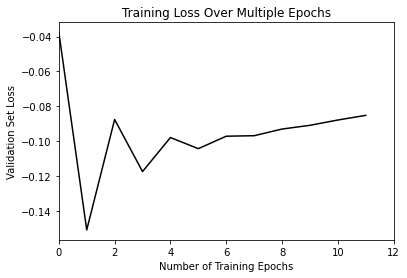

In [188]:
## Question 2: Visualize learning curve for loss and epochs during training
Logistic_Regression.plot_loss_epochs(loss) 

''' Note: Since early termination condition does not initiate until at least 
          10 epochs of training have occurred, an increase in loss prior to 
          10th iteration will not result in early termination. I did this purely
          for the purpose of showing > 3-4 epochs on the graph. Without the 
          minimum iterations condition, training terminates after 4 epochs. '''

In [196]:
## Question 3: Accuracy on training, validation, and testing dataset 

# predict labels for test/valid/train data using trained regressor 
predictions_test, labels_test = Logistic_Regression.predicted_output(X_test,trained_weights, trained_bias)
predictions_valid, labels_valid = Logistic_Regression.predicted_output(X_val,trained_weights, trained_bias)
predictions_train, labels_train = Logistic_Regression.predicted_output(X_train,trained_weights, trained_bias)
# calculate accuracies for train/valid/test datasets 
accuracy_train = Logistic_Regression.accuracy(labels_test, y_test)
accuracy_valid = Logistic_Regression.accuracy(labels_valid, y_val)
accuracy_test = Logistic_Regression.accuracy(labels_train, y_train)

print('Training accuracy:', accuracy_train)
print('Validation accuracy:', accuracy_valid)
print('Testing accuracy:', accuracy_test)

Training accuracy: 0.8666666666666667
Validation accuracy: 1.0
Testing accuracy: 0.9495798319327731


In [197]:
## Question 4: Comparison to SKL logistic regressor 

from sklearn.linear_model import LogisticRegression

# instantiate Preprocessing class instance (repeated from above)
Processor = Preprocessing(train_ratio=0.8, test_ratio=0.1, val_ratio=0.1)
X, y = Processor.import_data()   
X_train_set, X_test, y_train_set, y_test = Processor.create_train_set(X,y)  
X_train, X_val, y_train, y_val = Processor.create_validation_set(X_train_set, 
                                                                 y_train_set)

clf = LogisticRegression()  # instantiate log reg instance
clf.fit(X_train, y_train)  # fit to training data

# predict labels for train/validation/test data sets 
predictions_train = clf.predict(X_train)
predictions_val = clf.predict(X_val)  
predictions_test = clf.predict(X_test)
# accuracy scores for train/validation/test data sets 
accuracy_train = clf.score(X_train, y_train)
accuracy_valid = clf.score(X_val, y_val)
accuracy_test = clf.score(X_test, y_test)

print('SKL training accuracy:', accuracy_train)
print('SKL validation accuracy:', accuracy_valid)
print('SKL testing accuracy:', accuracy_test)

SKL training accuracy: 0.9747899159663865
SKL validation accuracy: 1.0
SKL testing accuracy: 1.0


In [198]:
# instantiate Preprocessing class instance  
Processor = Preprocessing(train_ratio=0.8, test_ratio=0.1, val_ratio=0.1)
# import Iris data set and store into X and y matrices 
X, y = Processor.import_data()   
# split X, y input datasets into training and testing sets (90:10)
X_train_set, X_test, y_train_set, y_test = Processor.create_train_set(X,y)  
# split training dataset into training and validation sets (90:10)
X_train, X_val, y_train, y_val = Processor.create_validation_set(X_train_set, 
                                                                 y_train_set)
# train logistic regressor using MSE
trained_weights2, trained_bias2, loss2 = Logistic_Regression.train_mse(X_train, 
                                                                y_train, X_val, 
                                                                y_val, 50, 0.1)


' Note: Since early termination condition does not initiate until at least \n10 epochs of training have occurred, an increase in loss prior to \n10th iteration will not result in early termination. I did this purely\nfor the purpose of showing > 3-4 epochs on the graph. Without the \nminimum iterations condition, training terminates after 4 epochs. '

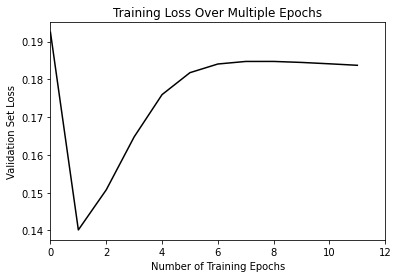

In [199]:
## Question 5: Visualize learning curve for loss and epochs during training
Logistic_Regression.plot_loss_epochs(loss2) 

''' Note: Since early termination condition does not initiate until at least 
10 epochs of training have occurred, an increase in loss prior to 
10th iteration will not result in early termination. I did this purely
for the purpose of showing > 3-4 epochs on the graph. Without the 
minimum iterations condition, training terminates after 4 epochs. '''


In [201]:
## Question 6: Accuracy on training, validation, and testing dataset 


# predict labels for test/valid/train data using trained regressor 
predictions_test2, labels_test2 = Logistic_Regression.predicted_output(X_test, trained_weights2, trained_bias2)
predictions_valid2, labels_valid2 = Logistic_Regression.predicted_output(X_val,trained_weights2, trained_bias2)
predictions_train2, labels_train2 = Logistic_Regression.predicted_output(X_train,trained_weights2, trained_bias2)
# calculate accuracies for train/valid/test datasets 
accuracy_train = Logistic_Regression.accuracy(labels_train2, y_train)
accuracy_valid = Logistic_Regression.accuracy(labels_valid2, y_val)
accuracy_test = Logistic_Regression.accuracy(labels_test2, y_test)

print('Training accuracy:', accuracy_train)
print('Validation accuracy:', accuracy_valid)
print('Testing accuracy:', accuracy_test)

Training accuracy: 0.8571428571428572
Validation accuracy: 0.8125
Testing accuracy: 0.9333333333333333
